In [1]:
import os
import pathlib
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gemmi

In [58]:
import pickle

In [50]:
import seaborn as sns

In [2]:
## Example "FORMUL   2  HOH   *360()" in 1a3h_final.pdb
## Example "HETATM 2396  O   HOH A 304      58.368  33.672  27.284  1.00  7.57           O" in the coordination section in 1a3h_final.pdb.
## Use information in atomic region to count waters. Use PDBParser of biopython package.

In [4]:
s_w=gemmi.read_structure("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data/1a3h_final.pdb")

In [22]:
structure = s_w
# Check model.
i = 0
model = structure[i]  # consider the first model (skip if empty)
while len(model) == 0:  # sometimes the first model is empty
    i += 1
    try:
        model = structure[i]
    except Exception:
        raise ValueError("Can't read valid model from the input PDB file!")
# Chain.
chain_dict={}
for chain in model:
    print('Residue #: ', len(chain))
    print(chain.name)
    water_list=[]
    for res in chain:
        # print(res.name)
        if res.name in ["HOH", "WAT"]: # Check if is water.
            water_list.append(res.name)

Residue #:  660
A


In [9]:
len(water_list)

360

In [10]:
# Training set.
train_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/train_split.txt", header=None)
train_list = train_list[0].tolist()
# Test set.
test_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/test_split.txt", header=None)
test_list = test_list[0].tolist()

In [11]:
len(train_list), len(test_list)

(4507, 1293)

In [12]:
## Loop through all pdb files.
pdb_path = pathlib.Path('/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data')
pdbs = list(pdb_path.glob('*_final.pdb')) # Pay attention to the pattern of names. A general "*.pdb" would result in duplicate files when looping.
# Train.
pdb_train = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in train_list:
        pdb_train.append(a)
# Test.
pdb_test = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in test_list:
        pdb_test.append(a)

In [29]:
# Training set.
gemmi_train_dict={}
for a in pdb_train:
    name = a.stem.split('_')[0]
    structure = gemmi.read_structure(str(a))
    # Check model.
    i = 0
    model = structure[i]  # consider the first model (skip if empty)
    while len(model) == 0:  # sometimes the first model is empty
        i += 1
        try:
            model = structure[i]
        except Exception:
            raise ValueError("Can't read valid model from the input PDB file!")
    # Chain.
    # water_list=[]
    for chain in model:
        water_list=[]
        for res in chain:
            if res.name in ["HOH", "WAT"]: # Check if is water.
                water_list.append(res.name)
        water_count = len(water_list)
    # Summarize as {chain: num_res}.
    gemmi_train_dict[name] = water_count # WRONG. Only collecting the last chain information.

In [25]:
# Training set. List waters for each chain.
wc_train_dict={}
for a in pdb_train:
    name = a.stem.split('_')[0]
    structure = gemmi.read_structure(str(a))
    # Check model.
    i = 0
    model = structure[i]  # consider the first model (skip if empty)
    while len(model) == 0:  # sometimes the first model is empty
        i += 1
        try:
            model = structure[i]
        except Exception:
            raise ValueError("Can't read valid model from the input PDB file!")
    # Chain.
    water_dict={}
    for chain in model:
        water_list=[]
        for res in chain:
            if res.name in ["HOH", "WAT"]: # Check if is water.
                water_list.append(res.name)
        water_count = len(water_list)
        water_dict[chain.name] = water_count
    # Summarize as {chain: num_res}.
    wc_train_dict[name] = water_dict

In [27]:
gemmi_train_dict

{'3lez': 336,
 '7sie': 376,
 '6rt3': 151,
 '3qx5': 9,
 '2hph': 490,
 '1od8': 522,
 '1gqv': 188,
 '2agg': 9,
 '2vpa': 358,
 '6svr': 248,
 '2chh': 185,
 '6y1j': 7,
 '3u3h': 430,
 '7vb1': 150,
 '8jeb': 0,
 '8p8y': 248,
 '7twx': 275,
 '6wcf': 171,
 '3v7x': 294,
 '5aot': 115,
 '5a8c': 496,
 '4lqh': 304,
 '8aqk': 13,
 '5xbx': 0,
 '7rh4': 199,
 '4nno': 285,
 '6tho': 247,
 '1h13': 416,
 '3rvk': 173,
 '2vu6': 312,
 '6ttn': 399,
 '5e2f': 230,
 '7rns': 20,
 '5rt0': 241,
 '7oyr': 1,
 '5pk7': 367,
 '5mnc': 292,
 '6d1i': 266,
 '1jm1': 246,
 '3ue2': 166,
 '7wdj': 138,
 '5u69': 459,
 '5emb': 17,
 '7mbo': 255,
 '7blk': 152,
 '5rvm': 250,
 '6fex': 315,
 '7fzo': 175,
 '3nk8': 350,
 '5nyk': 259,
 '5a0p': 211,
 '5lvd': 352,
 '5y9z': 231,
 '4hi8': 100,
 '5srk': 214,
 '3fbw': 403,
 '5a67': 208,
 '2p9w': 366,
 '2nmy': 103,
 '5wa8': 113,
 '5pjz': 371,
 '6ixd': 134,
 '2yl0': 273,
 '6s5w': 152,
 '4nud': 155,
 '6rzg': 172,
 '1s83': 245,
 '8olk': 288,
 '5ktx': 194,
 '5dp2': 452,
 '4j20': 0,
 '6b00': 312,
 '2hs1': 

In [28]:
wc_train_dict

{'3lez': {'A': 336},
 '7sie': {'A': 376},
 '6rt3': {'A': 151},
 '3qx5': {'L': 56, 'H': 307, 'I': 9},
 '2hph': {'A': 490},
 '1od8': {'A': 522},
 '1gqv': {'A': 188},
 '2agg': {'X': 326, 'A': 9},
 '2vpa': {'A': 358},
 '6svr': {'A': 248},
 '2chh': {'A': 185},
 '6y1j': {'A': 273, 'P': 7},
 '3u3h': {'A': 430},
 '7vb1': {'A': 150},
 '8jeb': {'B': 158, 'A': 144, 'C': 0, 'D': 0, 'E': 0, 'F': 0},
 '8p8y': {'A': 248},
 '7twx': {'A': 270, 'B': 275},
 '6wcf': {'A': 171},
 '3v7x': {'A': 294},
 '5aot': {'A': 115},
 '5a8c': {'A': 496},
 '4lqh': {'A': 304},
 '8aqk': {'A': 51, 'B': 135, 'C': 13},
 '5xbx': {'A': 211, 'B': 0, 'C': 0},
 '7rh4': {'A': 199},
 '4nno': {'A': 285},
 '6tho': {'A': 250, 'B': 247},
 '1h13': {'A': 416},
 '3rvk': {'A': 173},
 '2vu6': {'A': 312},
 '6ttn': {'A': 399},
 '5e2f': {'A': 265, 'B': 230},
 '7rns': {'A': 148, 'B': 20},
 '5rt0': {'A': 229, 'B': 241},
 '7oyr': {'A': 255, 'B': 4, 'C': 1},
 '5pk7': {'A': 367},
 '5mnc': {'A': 292},
 '6d1i': {'A': 266},
 '1jm1': {'A': 246},
 '3ue2'

In [30]:
# Test set.
wc_test_dict={}
for a in pdb_test:
    name = a.stem.split('_')[0]
    structure = gemmi.read_structure(str(a))
    # Check model.
    i = 0
    model = structure[i]  # consider the first model (skip if empty)
    while len(model) == 0:  # sometimes the first model is empty
        i += 1
        try:
            model = structure[i]
        except Exception:
            raise ValueError("Can't read valid model from the input PDB file!")
    # Chain.
    water_dict={}
    for chain in model:
        water_list=[]
        for res in chain:
            if res.name in ["HOH", "WAT"]: # Check if is water.
                water_list.append(res.name)
        water_count = len(water_list)
        water_dict[chain.name] = water_count
    # Summarize as {chain: num_res}.
    wc_test_dict[name] = water_dict

In [31]:
wc_test_dict

{'6zw2': {'A': 282, 'B': 217},
 '4hr3': {'A': 535},
 '6yp2': {'A': 306, 'P': 11},
 '5pbi': {'A': 146},
 '7f5c': {'A': 120},
 '1k63': {'A': 411},
 '3dib': {'A': 209},
 '3akh': {'A': 526, 'B': 0, 'C': 0, 'D': 0},
 '5os9': {'A': 136, 'B': 94},
 '5j0k': {'A': 90, 'B': 103},
 '5oo8': {'A': 126},
 '7oqa': {'A': 302, 'P': 10},
 '3r9g': {'A': 245, 'B': 223},
 '4kb1': {'A': 227, 'B': 160, 'C': 27, 'D': 19},
 '3eo9': {'L': 304, 'H': 281},
 '3o2g': {'A': 422},
 '3dmx': {'A': 234},
 '6chk': {'A': 280},
 '6mra': {'A': 178, 'B': 250},
 '2x5o': {'A': 478},
 '3v1v': {'A': 388},
 '2bs6': {'A': 120, 'B': 111, 'C': 97, 'D': 0, 'E': 0, 'F': 0},
 '4gco': {'A': 137},
 '2ywr': {'A': 223},
 '5pq8': {'A': 111, 'B': 136},
 '5s27': {'A': 186, 'B': 170},
 '5rkh': {'A': 192},
 '5pto': {'A': 107, 'B': 141},
 '3mch': {'A': 202, 'B': 163, 'C': 132},
 '7m0f': {'A': 158, 'B': 167},
 '5ut8': {'A': 197},
 '7or8': {'A': 304, 'P': 10},
 '6sa9': {'A': 132, 'B': 140},
 '7m98': {'A': 133, 'B': 16},
 '1w1o': {'A': 521, 'B': 0}

In [59]:
# Store the water count dictionaries.
with open("train_WAT_dict.pkl", "wb") as f:
    pickle.dump(wc_train_dict, f)
with open("test_WAT_dict.pkl", "wb") as f:
    pickle.dump(wc_test_dict, f)

In [15]:
AA=['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 
    'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

In [16]:
# Residues.
res_train_dict={}
for a in pdb_train:
    name = a.stem.split('_')[0]
    structure = gemmi.read_structure(str(a))
    # Check model.
    i = 0
    model = structure[i]  # consider the first model (skip if empty)
    while len(model) == 0:  # sometimes the first model is empty
        i += 1
        try:
            model = structure[i]
        except Exception:
            raise ValueError("Can't read valid model from the input PDB file!")
    # Chain.
    chain_dict={}
    for chain in model:
        res_list=[]
        for res in chain:
            if res.name in AA: # IMPORTANT: screening if the residue is an amino acid.  
                res_list.append(res.name)
        chain_dict[chain.name] = len(res_list)
    # Summarize as {chain: num_res}.
    res_train_dict[name] = chain_dict

res_test_dict={}
for a in pdb_test:
    name = a.stem.split('_')[0]
    structure = gemmi.read_structure(str(a))
    # Check model.
    i = 0
    model = structure[i]  # consider the first model (skip if empty)
    while len(model) == 0:  # sometimes the first model is empty
        i += 1
        try:
            model = structure[i]
        except Exception:
            raise ValueError("Can't read valid model from the input PDB file!")
    # Chain.
    chain_dict={}
    for chain in model:
        res_list=[]
        for res in chain:
            if res.name in AA: # IMPORTANT: screening if the residue is an amino acid.  
                res_list.append(res.name)
        chain_dict[chain.name] = len(res_list)
    # Summarize as {chain: num_res}.
    res_test_dict[name] = chain_dict

In [32]:
res_train_dict

{'3lez': {'A': 260},
 '7sie': {'A': 255},
 '6rt3': {'A': 129},
 '3qx5': {'L': 28, 'H': 251, 'I': 10},
 '2hph': {'A': 305},
 '1od8': {'A': 302},
 '1gqv': {'A': 135},
 '2agg': {'X': 223, 'A': 2},
 '2vpa': {'A': 204},
 '6svr': {'A': 223},
 '2chh': {'A': 113},
 '6y1j': {'A': 235, 'P': 6},
 '3u3h': {'A': 386},
 '7vb1': {'A': 133},
 '8jeb': {'B': 141, 'A': 141, 'C': 0, 'D': 0, 'E': 0, 'F': 0},
 '8p8y': {'A': 232},
 '7twx': {'A': 168, 'B': 168},
 '6wcf': {'A': 166},
 '3v7x': {'A': 258},
 '5aot': {'A': 102},
 '5a8c': {'A': 299},
 '4lqh': {'A': 174},
 '8aqk': {'A': 40, 'B': 154, 'C': 2},
 '5xbx': {'A': 179, 'B': 0, 'C': 0},
 '7rh4': {'A': 138},
 '4nno': {'A': 278},
 '6tho': {'A': 220, 'B': 219},
 '1h13': {'A': 404},
 '3rvk': {'A': 129},
 '2vu6': {'A': 207},
 '6ttn': {'A': 300},
 '5e2f': {'A': 229, 'B': 229},
 '7rns': {'A': 110, 'B': 8},
 '5rt0': {'A': 167, 'B': 169},
 '7oyr': {'A': 257, 'B': 2, 'C': 0},
 '5pk7': {'A': 331},
 '5mnc': {'A': 223},
 '6d1i': {'A': 229},
 '1jm1': {'A': 202},
 '3ue2':

In [42]:
# Example of 3qx5.
print(res_train_dict["3qx5"]) # residue.
print(wc_train_dict["3qx5"]) # water.
print(list(wc_train_dict["3qx5"].values()))

{'L': 28, 'H': 251, 'I': 10}
{'L': 56, 'H': 307, 'I': 9}
[56, 307, 9]


In [38]:
## Generate a new dictionary of water/residues for each chain for each PDB.
# 1. Training set.
w_over_r_dict = {}
for name, res_dict in res_train_dict.items():
    wat_dict = wc_train_dict[name]
    sub_dict = {}
    for chain, wat_count in wat_dict.items():
        try:
            sub_dict[chain] = wat_count / res_dict[chain]
        except:
            print("0 residue:", name, chain)
    w_over_r_dict[name] = sub_dict



0 residue: 8jeb C
0 residue: 8jeb D
0 residue: 8jeb E
0 residue: 8jeb F
0 residue: 5xbx B
0 residue: 5xbx C
0 residue: 7oyr C
0 residue: 7fdz B
0 residue: 4yz0 C
0 residue: 4yz0 D
0 residue: 4bfo B
0 residue: 7zco E
0 residue: 7zco F
0 residue: 4wk9 B
0 residue: 6x8a B
0 residue: 6ri6 B
0 residue: 6ri6 C
0 residue: 6pzd B
0 residue: 6jwb B
0 residue: 5nlh B
0 residue: 5mhx B
0 residue: 5mhx C
0 residue: 6m8f B
0 residue: 1gwm B
0 residue: 3pfx B
0 residue: 3pfx C
0 residue: 3pfx D
0 residue: 5mid B
0 residue: 5mid C
0 residue: 4eis C
0 residue: 4eis D
0 residue: 5fc1 B
0 residue: 5fc1 C
0 residue: 5fc1 D
0 residue: 5fc1 E
0 residue: 6hpf B
0 residue: 6kwf B
0 residue: 1w8u B
0 residue: 4nih B
0 residue: 4nih C
0 residue: 5mk9 B
0 residue: 4izx B
0 residue: 8ped B
0 residue: 8ped C
0 residue: 6er4 C
0 residue: 6er4 D
0 residue: 4wkh B
0 residue: 2xjs B
0 residue: 4yza C
0 residue: 4yza D
0 residue: 5mtt B
0 residue: 5mhu B
0 residue: 5mhu C
0 residue: 2nn8 B
0 residue: 2nn8 C
0 residue:

In [40]:
## Generate a new dictionary of water/residues for each chain for each PDB.
# 2. Test set.
w_over_r_test = {}
for name, res_dict in res_test_dict.items():
    wat_dict = wc_test_dict[name]
    sub_dict = {}
    for chain, wat_count in wat_dict.items():
        try:
            sub_dict[chain] = wat_count / res_dict[chain]
        except:
            print("0 residue:", name, chain)
    w_over_r_test[name] = sub_dict



0 residue: 3akh B
0 residue: 3akh C
0 residue: 3akh D
0 residue: 4kb1 C
0 residue: 4kb1 D
0 residue: 2bs6 D
0 residue: 2bs6 E
0 residue: 2bs6 F
0 residue: 1w1o B
0 residue: 3ilf B
0 residue: 3gd9 B
0 residue: 2pi6 B
0 residue: 4ect T
0 residue: 4ect P
0 residue: 2fmp D
0 residue: 2fmp P
0 residue: 2fmp T
0 residue: 6ipd T
0 residue: 6ipd P
0 residue: 6ipd D
0 residue: 2ih5 B
0 residue: 2ih5 C
0 residue: 4yr0 P
0 residue: 4yr0 T
0 residue: 4p8s B
0 residue: 4p8s C
0 residue: 4hc9 Y
0 residue: 4hc9 Z
0 residue: 8vn1 C
0 residue: 8vn1 D
0 residue: 7eej B
0 residue: 6jao B
0 residue: 5kfz T
0 residue: 5kfz P
0 residue: 2wao B
0 residue: 6jap B
0 residue: 4htu C
0 residue: 4htu D
0 residue: 4htu E
0 residue: 4htu F
0 residue: 4n2z B
0 residue: 2cix B
0 residue: 2cix C
0 residue: 2cix D
0 residue: 3u7f X
0 residue: 5kiq C
0 residue: 5twq D
0 residue: 5twq P
0 residue: 5twq T
0 residue: 4pyh B
0 residue: 1y1f A
0 residue: 4ibw B
0 residue: 4jcy C
0 residue: 4jcy D
0 residue: 6cr4 D
0 residue:

In [44]:
## Generate a new dictionary of sum of water/sum of residues for each PDB.
# 1. Training set.
S_w_over_r_train = {}
for name, res_dict in res_train_dict.items():
    wat_dict = wc_train_dict[name]
    wat_sum = np.sum(list(wat_dict.values()))
    res_sum = np.sum(list(res_dict.values()))
    ratio = wat_sum / res_sum
    S_w_over_r_train[name] = ratio

# 2. Test set.
S_w_over_r_test = {}
for name, res_dict in res_test_dict.items():
    wat_dict = wc_test_dict[name]
    wat_sum = np.sum(list(wat_dict.values()))
    res_sum = np.sum(list(res_dict.values()))
    ratio = wat_sum / res_sum
    S_w_over_r_test[name] = ratio

In [39]:
w_over_r_dict

{'3lez': {'A': 1.2923076923076924},
 '7sie': {'A': 1.4745098039215687},
 '6rt3': {'A': 1.1705426356589148},
 '3qx5': {'L': 2.0, 'H': 1.2231075697211156, 'I': 0.9},
 '2hph': {'A': 1.6065573770491803},
 '1od8': {'A': 1.728476821192053},
 '1gqv': {'A': 1.3925925925925926},
 '2agg': {'X': 1.4618834080717489, 'A': 4.5},
 '2vpa': {'A': 1.7549019607843137},
 '6svr': {'A': 1.1121076233183858},
 '2chh': {'A': 1.6371681415929205},
 '6y1j': {'A': 1.1617021276595745, 'P': 1.1666666666666667},
 '3u3h': {'A': 1.1139896373056994},
 '7vb1': {'A': 1.1278195488721805},
 '8jeb': {'B': 1.1205673758865249, 'A': 1.0212765957446808},
 '8p8y': {'A': 1.0689655172413792},
 '7twx': {'A': 1.6071428571428572, 'B': 1.6369047619047619},
 '6wcf': {'A': 1.0301204819277108},
 '3v7x': {'A': 1.1395348837209303},
 '5aot': {'A': 1.1274509803921569},
 '5a8c': {'A': 1.6588628762541806},
 '4lqh': {'A': 1.7471264367816093},
 '8aqk': {'A': 1.275, 'B': 0.8766233766233766, 'C': 6.5},
 '5xbx': {'A': 1.1787709497206704},
 '7rh4': {

In [45]:
S_w_over_r_train

{'3lez': np.float64(1.2923076923076924),
 '7sie': np.float64(1.4745098039215687),
 '6rt3': np.float64(1.1705426356589148),
 '3qx5': np.float64(1.28719723183391),
 '2hph': np.float64(1.6065573770491803),
 '1od8': np.float64(1.728476821192053),
 '1gqv': np.float64(1.3925925925925926),
 '2agg': np.float64(1.488888888888889),
 '2vpa': np.float64(1.7549019607843137),
 '6svr': np.float64(1.1121076233183858),
 '2chh': np.float64(1.6371681415929205),
 '6y1j': np.float64(1.161825726141079),
 '3u3h': np.float64(1.1139896373056994),
 '7vb1': np.float64(1.1278195488721805),
 '8jeb': np.float64(1.070921985815603),
 '8p8y': np.float64(1.0689655172413792),
 '7twx': np.float64(1.6220238095238095),
 '6wcf': np.float64(1.0301204819277108),
 '3v7x': np.float64(1.1395348837209303),
 '5aot': np.float64(1.1274509803921569),
 '5a8c': np.float64(1.6588628762541806),
 '4lqh': np.float64(1.7471264367816093),
 '8aqk': np.float64(1.0153061224489797),
 '5xbx': np.float64(1.1787709497206704),
 '7rh4': np.float64(1.

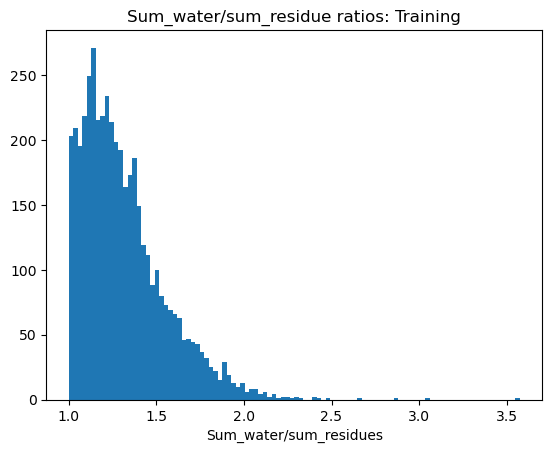

In [ ]:
# Training set. water/residues for each PDB (summing).
data = list(S_w_over_r_train.values()) 
plt.hist(data, bins=100)
plt.xlabel("Sum_water/sum_residues")
# plt.ylabel("Number of proteins")
plt.title("Sum_water/sum_residue ratios: Training")
plt.savefig("figures/2_train_Sum_wat_over_res_dist.png", dpi=200)
plt.show()

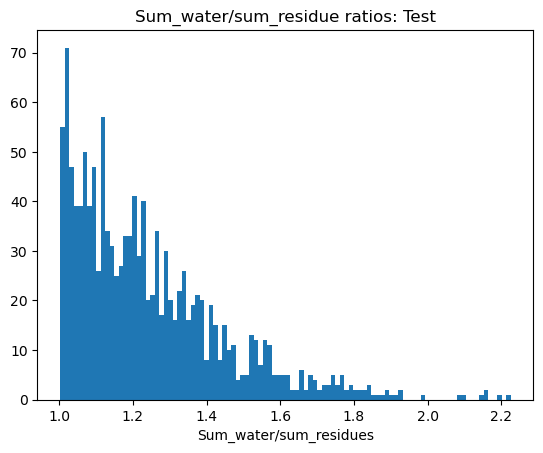

In [47]:
# Test set. water/residues for each PDB (summing).
data = list(S_w_over_r_test.values()) 
plt.hist(data, bins=100)
plt.xlabel("Sum_water/sum_residues")
# plt.ylabel("Number of proteins")
plt.title("Sum_water/sum_residue ratios: Test")
plt.savefig("figures/2_test_Sum_wat_over_res_dist.png", dpi=200)
plt.show()

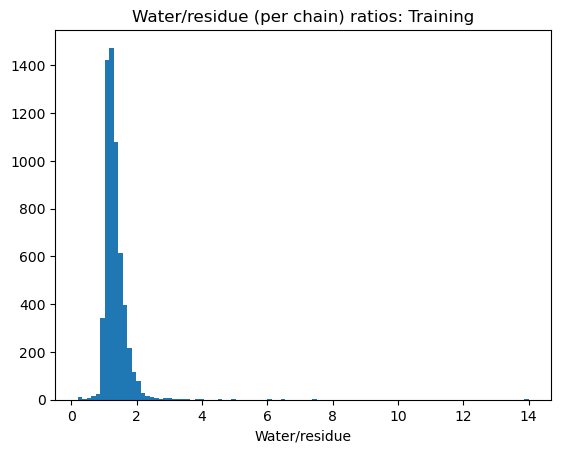

In [48]:
# Training set. water/residues for each CHAIN.
nested = [list(v.values()) for v in w_over_r_dict.values()]
data =[item for sublist in nested for item in sublist if item!= 0] # Flatten the data to show all chains.
plt.hist(data, bins=100)
plt.xlabel("Water/residue")
# plt.ylabel("Number of proteins")
plt.title("Water/residue (per chain) ratios: Training")
plt.savefig("figures/2_train_per_wat_over_res_dist.png", dpi=200)
plt.show()

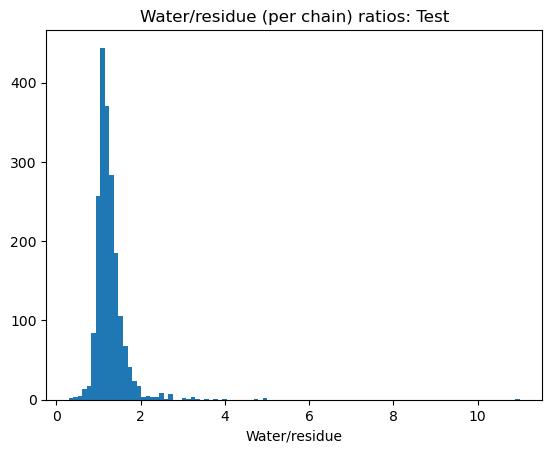

In [49]:
# Test set. water/residues for each CHAIN.
nested = [list(v.values()) for v in w_over_r_test.values()]
data =[item for sublist in nested for item in sublist if item!= 0] # Flatten the data to show all chains.
plt.hist(data, bins=100)
plt.xlabel("Water/residue")
# plt.ylabel("Number of proteins")
plt.title("Water/residue (per chain) ratios: Test")
plt.savefig("figures/2_test_per_wat_over_res_dist.png", dpi=200)
plt.show()

## Plot PDF with seaborn.

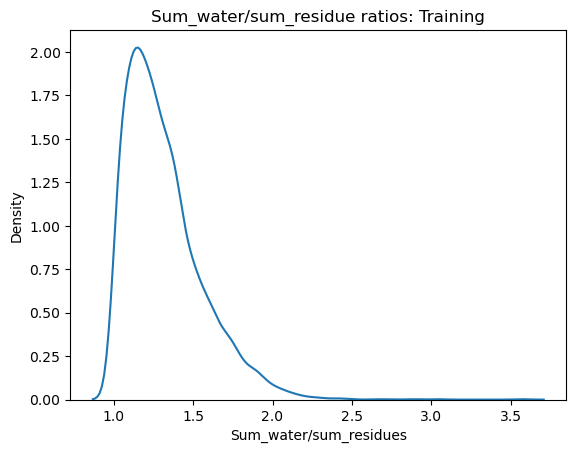

In [51]:
# Training set. water/residues for each PDB (summing).
data = list(S_w_over_r_train.values()) 
df = pd.DataFrame(data, columns=['Sum_water/sum_residues'])
sns.kdeplot(df, x='Sum_water/sum_residues', label='Training')
plt.title("Sum_water/sum_residue ratios: Training")
plt.savefig("figures/2_PDF_train_Sum_wat_over_res_dist.png", dpi=200)
plt.show()

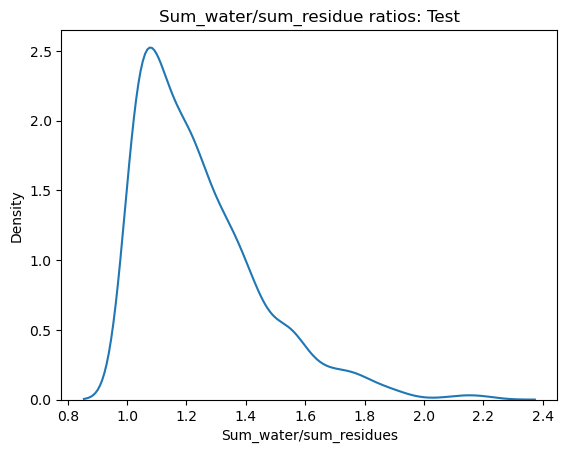

In [52]:
# Training set. water/residues for each PDB (summing).
data = list(S_w_over_r_test.values()) 
df = pd.DataFrame(data, columns=['Sum_water/sum_residues'])
sns.kdeplot(df, x='Sum_water/sum_residues', label='Test')
plt.title("Sum_water/sum_residue ratios: Test")
plt.savefig("figures/2_PDF_test_Sum_wat_over_res_dist.png", dpi=200)
plt.show()

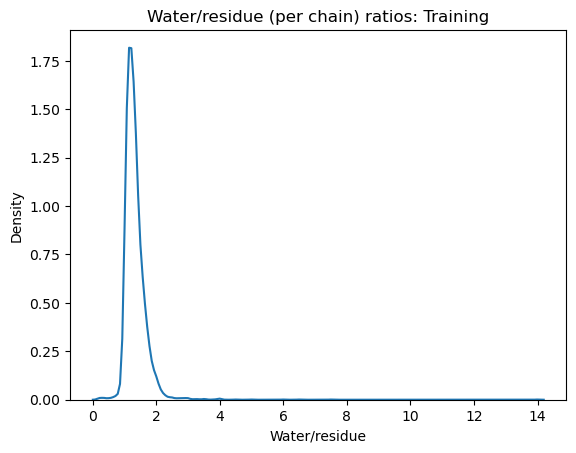

In [53]:
# Training set. water/residues for each CHAIN.
nested = [list(v.values()) for v in w_over_r_dict.values()]
data =[item for sublist in nested for item in sublist if item!= 0] # Flatten the data to show all chains.
df = pd.DataFrame(data, columns=['Water/residue'])
sns.kdeplot(df, x='Water/residue', label='Training')
plt.title("Water/residue (per chain) ratios: Training")
plt.savefig("figures/2_PDF_train_per_wat_over_res_dist.png", dpi=200)
plt.show()

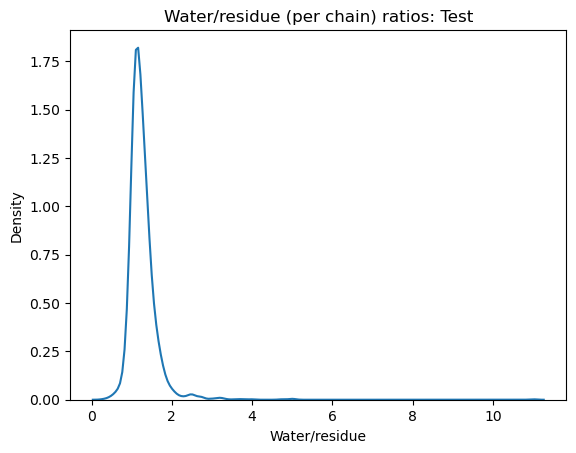

In [54]:
# Test set. water/residues for each CHAIN.
nested = [list(v.values()) for v in w_over_r_test.values()]
data =[item for sublist in nested for item in sublist if item!= 0] # Flatten the data to show all chains.
df = pd.DataFrame(data, columns=['Water/residue'])
sns.kdeplot(df, x='Water/residue', label='Test')
plt.title("Water/residue (per chain) ratios: Test")
plt.savefig("figures/2_PDF_test_per_wat_over_res_dist.png", dpi=200)
plt.show()

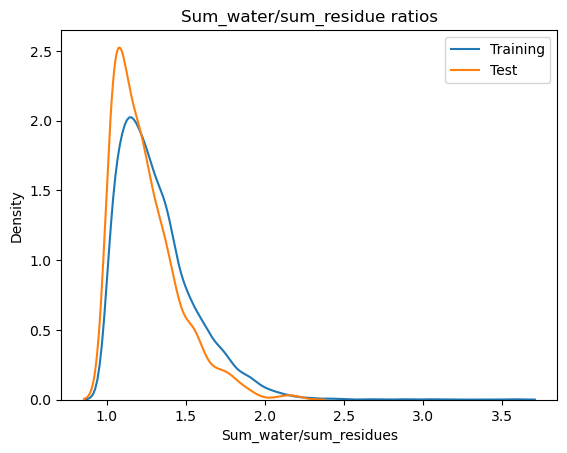

In [55]:
# Combined. water/residues for each PDB (summing).
data = list(S_w_over_r_train.values())
data2 = list(S_w_over_r_test.values())
df = pd.DataFrame(data, columns=['Sum_water/sum_residues'])
df2 = pd.DataFrame(data2, columns=['Sum_water/sum_residues'])
sns.kdeplot(df, x='Sum_water/sum_residues', label='Training')
sns.kdeplot(df2, x='Sum_water/sum_residues', label='Test')
plt.title("Sum_water/sum_residue ratios")
plt.legend()
plt.savefig("figures/2_PDF_Both_Sum_wat_over_res_dist.png", dpi=200)
plt.show()

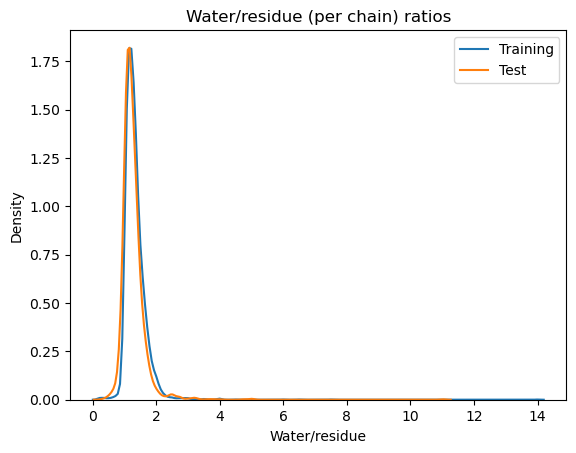

In [56]:
# Both set. water/residues for each CHAIN.
nested = [list(v.values()) for v in w_over_r_dict.values()]
data =[item for sublist in nested for item in sublist if item!= 0] # Flatten the data to show all chains.
nested2 = [list(v.values()) for v in w_over_r_test.values()]
data2 =[item for sublist in nested2 for item in sublist if item!= 0] # Flatten the data to show all chains.
df = pd.DataFrame(data, columns=['Water/residue'])
df2 = pd.DataFrame(data2, columns=['Water/residue'])
sns.kdeplot(df, x='Water/residue', label='Training')
sns.kdeplot(df2, x='Water/residue', label='Test')
plt.title("Water/residue (per chain) ratios")
plt.legend()
plt.savefig("figures/2_PDF_Both_per_wat_over_res_dist.png", dpi=200)
plt.show()